优点：精度高、对异常值不敏感、无数据输入假定。
缺点：计算复杂度高、空间复杂度高。
适用数据范围：数值型和标称型。

工作原理：存在一个样本数
据集合，也称作训练样本集，并且样本集中每个数据都存在标签，即我们知道样本集中每一数据
与所属分类的对应关系。输入没有标签的新数据后，将新数据的每个特征与样本集中数据对应的
特征进行比较，然后算法提取样本集中特征最相似数据（最近邻）的分类标签。一般来说，我们
只选择样本数据集中前k个最相似的数据，这就是k-近邻算法中k的出处，通常k是不大于20的整数。
最后，选择k个最相似数据中出现次数最多的分类，作为新数据的分类。

In [5]:
# -*- coding: UTF-8 -*-
import numpy as np
 
"""
函数说明:创建数据集
 
Parameters:
    无
Returns:
    group - 数据集
    labels - 分类标签
Modify:
    2017-07-13
"""
def createDataSet():
    #四组二维特征
    group = np.array([[1,101],[5,89],[108,5],[115,8]])
    #四组特征的标签
    labels = ['爱情片','爱情片','动作片','动作片']
    return group, labels
if __name__ == '__main__':
    #创建数据集
    group, labels = createDataSet()
    #打印数据集
    print(group)
    print(labels)
    
    import time
    times =time.perf_counter()
    print(times)

[[  1 101]
 [  5  89]
 [108   5]
 [115   8]]
['爱情片', '爱情片', '动作片', '动作片']
462.0825988


In [10]:
# -*- coding: UTF-8 -*-
import numpy as np
import operator
 
"""
函数说明:创建数据集
 
Parameters:
    无
Returns:
    group - 数据集
    labels - 分类标签
Modify:
    2017-07-13
"""
def createDataSet():
    #四组二维特征
    group = np.array([[1,101],[5,89],[108,5],[115,8]])
    #四组特征的标签
    labels = ['爱情片','爱情片','动作片','动作片']
    return group, labels
 
"""
函数说明:kNN算法,分类器
 
Parameters:
    inX - 用于分类的数据(测试集)
    dataSet - 用于训练的数据(训练集)
    labes - 分类标签
    k - kNN算法参数,选择距离最小的k个点
Returns:
    sortedClassCount[0][0] - 分类结果
 
Modify:
    2017-07-13
"""
def classify0(inX, dataSet, labels, k):
    #numpy函数shape[0]返回dataSet的行数
    dataSetSize = dataSet.shape[0]
    print(dataSetSize)
    #在列向量方向上重复inX共1次(横向)，行向量方向上重复inX共dataSetSize次(纵向)
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    #print(np.tile(inX, (dataSetSize, 1)))
    #print(diffMat)
    #二维特征相减后平方
    sqDiffMat = diffMat**2
    #print(sqDiffMat)
    #sum()所有元素相加，sum(0)列相加，sum(1)行相加
    sqDistances = sqDiffMat.sum(axis=1)
    #print(sqDistances)
    #开方，计算出距离
    distances = sqDistances**0.5
    #返回distances中元素从小到大排序后的索引值
    sortedDistIndices = distances.argsort()
    #print(sortedDistIndices)
    #定一个记录类别次数的字典
    classCount = {}
    for i in range(k):
        #取出前k个元素的类别
        voteIlabel = labels[sortedDistIndices[i]]
        #print(type(voteIlabel))
        #dict.get(key,default=None),字典的get()方法,返回指定键的值,如果值不在字典中返回默认值。
        #计算类别次数
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
        
    #python3中用items()替换python2中的iteritems()
    #key=operator.itemgetter(1)根据字典的值进行排序
    #key=operator.itemgetter(0)根据字典的键进行排序
    #reverse降序排序字典
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    #返回次数最多的类别,即所要分类的类别
    return sortedClassCount[0][0]
 
if __name__ == '__main__':
    #创建数据集
    group, labels = createDataSet()
    #测试集
    test = [101,20]
    #kNN分类
    test_class = classify0(test, group, labels, 3)
    #打印分类结果
    print(test_class)
    import time
    times =time.perf_counter()
    end=time.perf_counter()
    print(end-times)

4
动作片
3.000000106112566e-07


### 导入并解析海伦约会数据集

In [2]:
# -*- coding: UTF-8 -*-
import numpy as np
"""
函数说明:打开并解析文件，对数据进行分类：1代表不喜欢,2代表魅力一般,3代表极具魅力
 
Parameters:
    filename - 文件名
Returns:
    returnMat - 特征矩阵
    classLabelVector - 分类Label向量
 
Modify:
    2017-03-24
"""
def file2matrix(filename):
    #打开文件
    fr = open(filename)
    #读取文件所有内容
    arrayOLines = fr.readlines()  #读取整个文件所有行，保存在一个列表(list)变量中，每行作为一个元素，但读取大文件会比较占内存
    #得到文件行数
    numberOfLines = len(arrayOLines)
    #返回的NumPy矩阵,解析完成的数据:numberOfLines行,3列
    returnMat = np.zeros((numberOfLines,3))
    #返回的分类标签向量
    classLabelVector = []
    #行的索引值
    index = 0
    for line in arrayOLines:
        #s.strip(rm)，当rm空时,默认删除空白符(包括'\n','\r','\t',' ')
        line = line.strip()
        #使用s.split(str="",num=string,cout(str))将字符串根据'\t'分隔符进行切片。
        listFromLine = line.split('\t')
        #将数据前三列提取出来,存放到returnMat的NumPy矩阵中,也就是特征矩阵
        returnMat[index,:] = listFromLine[0:3]
        #根据文本中标记的喜欢的程度进行分类,1代表不喜欢,2代表魅力一般,3代表极具魅力
        if listFromLine[-1] == 'didntLike':
            classLabelVector.append(1)
        elif listFromLine[-1] == 'smallDoses':
            classLabelVector.append(2)
        elif listFromLine[-1] == 'largeDoses':
            classLabelVector.append(3)
        index += 1
    return returnMat, classLabelVector
 
"""
函数说明:main函数
 
Parameters:
    无
Returns:
    无
 
Modify:
    2017-03-24
"""
if __name__ == '__main__':
    #打开的文件名
    filename = "datingTestSet.txt"
    #打开并处理数据
    datingDataMat, datingLabels = file2matrix(filename)
    print(datingDataMat)
    print(datingLabels)

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]
[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 2, 2, 1, 3, 1, 1, 3, 3, 1, 2, 3, 1, 3, 1, 2, 2, 1, 1, 3, 3, 1, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 2, 1, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 2, 1, 1, 3, 2, 3, 3, 1, 2, 1, 3, 1, 2, 3, 2, 3, 1, 1, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 2, 3, 2, 3, 2, 1, 1, 3, 1, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 1, 3, 3, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 3, 2, 2, 3, 1, 3, 1, 1, 2, 1, 2, 2, 1, 

数据可视化

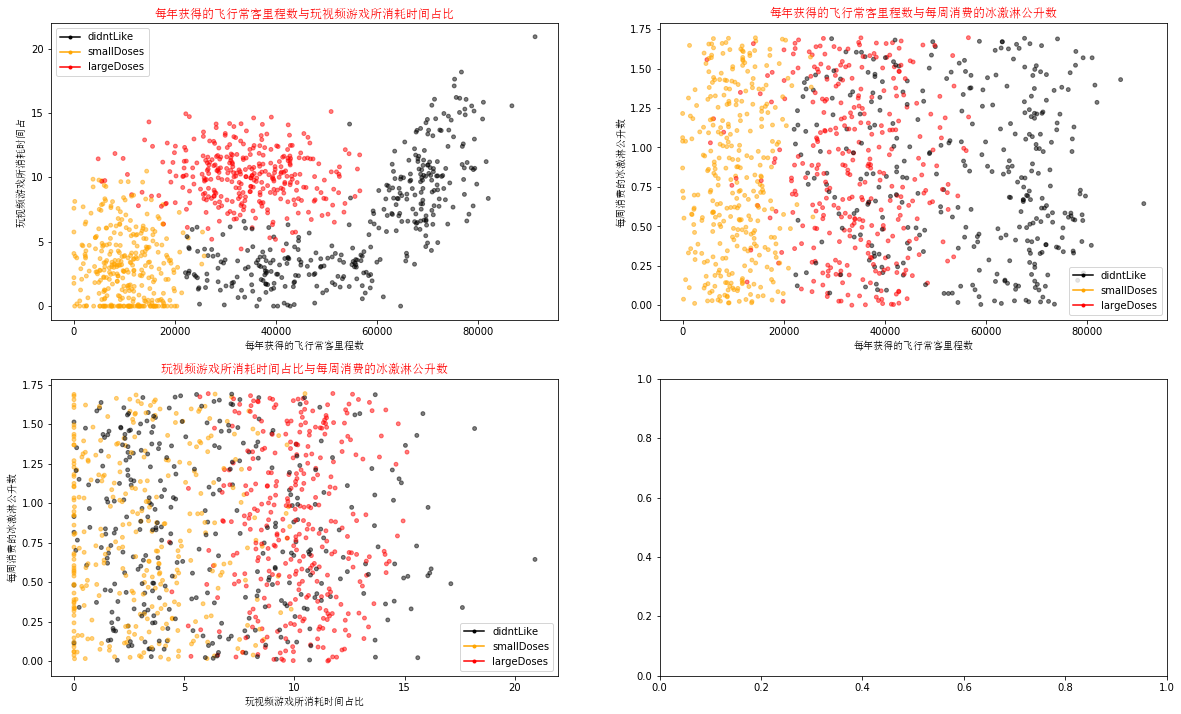

In [4]:
# -*- coding: UTF-8 -*-
from matplotlib.font_manager import FontProperties
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
 
"""
函数说明:可视化数据
 
Parameters:
    datingDataMat - 特征矩阵
    datingLabels - 分类Label
Returns:
    无
Modify:
    2017-03-24
"""
def showdatas(datingDataMat, datingLabels):
    #设置汉字格式
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=16)
    #将fig画布分隔成1行1列,不共享x轴和y轴,fig画布的大小为(13,8)
    #当nrow=2,nclos=2时,代表fig画布被分为四个区域,axs[0][0]表示第一行第一个区域
    fig, axs = plt.subplots(nrows=2, ncols=2,sharex=False, sharey=False, figsize=(20,12))
 
    numberOfLabels = len(datingLabels)
    LabelsColors = []
    for i in datingLabels:
        if i == 1:
            LabelsColors.append('black')
        if i == 2:
            LabelsColors.append('orange')
        if i == 3:
            LabelsColors.append('red')
    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第二列(玩游戏)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][0].scatter(x=datingDataMat[:,0], y=datingDataMat[:,1], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs0_title_text = axs[0][0].set_title(u'每年获得的飞行常客里程数与玩视频游戏所消耗时间占比',FontProperties=font)
    axs0_xlabel_text = axs[0][0].set_xlabel(u'每年获得的飞行常客里程数',FontProperties=font)
    axs0_ylabel_text = axs[0][0].set_ylabel(u'玩视频游戏所消耗时间占',FontProperties=font)
    plt.setp(axs0_title_text, size=12, weight='bold', color='red') 
    plt.setp(axs0_xlabel_text, size=10, weight='bold', color='black') 
    plt.setp(axs0_ylabel_text, size=10, weight='bold', color='black')
 
    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][1].scatter(x=datingDataMat[:,0], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs1_title_text = axs[0][1].set_title(u'每年获得的飞行常客里程数与每周消费的冰激淋公升数',FontProperties=font)
    axs1_xlabel_text = axs[0][1].set_xlabel(u'每年获得的飞行常客里程数',FontProperties=font)
    axs1_ylabel_text = axs[0][1].set_ylabel(u'每周消费的冰激淋公升数',FontProperties=font)
    plt.setp(axs1_title_text, size=12, weight='bold', color='red') 
    plt.setp(axs1_xlabel_text, size=10, weight='bold', color='black') 
    plt.setp(axs1_ylabel_text, size=10, weight='bold', color='black')
 
    #画出散点图,以datingDataMat矩阵的第二(玩游戏)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[1][0].scatter(x=datingDataMat[:,1], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs2_title_text = axs[1][0].set_title(u'玩视频游戏所消耗时间占比与每周消费的冰激淋公升数',FontProperties=font)
    axs2_xlabel_text = axs[1][0].set_xlabel(u'玩视频游戏所消耗时间占比',FontProperties=font)
    axs2_ylabel_text = axs[1][0].set_ylabel(u'每周消费的冰激淋公升数',FontProperties=font)
    plt.setp(axs2_title_text, size=12, weight='bold', color='red') 
    plt.setp(axs2_xlabel_text, size=10, weight='bold', color='black') 
    plt.setp(axs2_ylabel_text, size=10, weight='bold', color='black')
    #设置图例
    didntLike = mlines.Line2D([], [], color='black', marker='.',
                      markersize=6, label='didntLike')
    smallDoses = mlines.Line2D([], [], color='orange', marker='.',
                      markersize=6, label='smallDoses')
    largeDoses = mlines.Line2D([], [], color='red', marker='.',
                      markersize=6, label='largeDoses')
    #添加图例
    axs[0][0].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[0][1].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[1][0].legend(handles=[didntLike,smallDoses,largeDoses])
    #显示图片
    plt.show()
 
"""
函数说明:main函数
 
Parameters:
    无
Returns:
    无
 
Modify:
    2017-03-24
"""
if __name__ == '__main__':
    #打开的文件名
    filename = "datingTestSet.txt"
    #打开并处理数据
    datingDataMat, datingLabels = file2matrix(filename)
    showdatas(datingDataMat, datingLabels)

准备数据：数据归一化，newValue = (oldValue - min) / (max - min)

In [5]:
"""
函数说明:对数据进行归一化
 
Parameters:
    dataSet - 特征矩阵
Returns:
    normDataSet - 归一化后的特征矩阵
    ranges - 数据范围
    minVals - 数据最小值
 
Modify:
    2017-03-24
"""
def autoNorm(dataSet):
    #获得数据的最小值
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    #最大值和最小值的范围
    ranges = maxVals - minVals
    #shape(dataSet)返回dataSet的矩阵行列数
    normDataSet = np.zeros(np.shape(dataSet))
    #返回dataSet的行数
    m = dataSet.shape[0]
    #原始值减去最小值
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    #除以最大和最小值的差,得到归一化数据
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    #返回归一化数据结果,数据范围,最小值
    return normDataSet, ranges, minVals
 
"""
函数说明:main函数
 
Parameters:
    无
Returns:
    无
 
Modify:
    2017-03-24
"""
if __name__ == '__main__':
    #打开的文件名
    filename = "datingTestSet.txt"
    #打开并处理数据
    datingDataMat, datingLabels = file2matrix(filename)
    normDataSet, ranges, minVals = autoNorm(datingDataMat)
    print(normDataSet)
    print(ranges)
    print(minVals)

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]
[9.1273000e+04 2.0919349e+01 1.6943610e+00]
[0.       0.       0.001156]


测试算法：验证分类器

In [12]:
"""
函数说明:分类器测试函数
 
Parameters:
    无
Returns:
    normDataSet - 归一化后的特征矩阵
    ranges - 数据范围
    minVals - 数据最小值
 
Modify:
    2017-03-24
"""
def datingClassTest():
    #打开的文件名
    filename = "datingTestSet.txt"
    #将返回的特征矩阵和分类向量分别存储到datingDataMat和datingLabels中
    datingDataMat, datingLabels = file2matrix(filename)
    #取所有数据的百分之十
    hoRatio = 0.10
    #数据归一化,返回归一化后的矩阵,数据范围,数据最小值
    normMat, ranges, minVals = autoNorm(datingDataMat)
    #获得normMat的行数
    m = normMat.shape[0]
    #百分之十的测试数据的个数
    numTestVecs = int(m * hoRatio)
    #分类错误计数
    errorCount = 0.0
 
    for i in range(numTestVecs):
        #前numTestVecs个数据作为测试集,后m-numTestVecs个数据作为训练集
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m,:],
            datingLabels[numTestVecs:m], 4)
        print("分类结果:%d\t真实类别:%d" % (classifierResult, datingLabels[i]))
        if classifierResult != datingLabels[i]:
            errorCount += 1.0
    print("错误率:%f%%" %(errorCount/float(numTestVecs)*100))
 
"""
函数说明:main函数
 
Parameters:
    无
Returns:
    无
 
Modify:
    2017-03-24
"""
if __name__ == '__main__':
    datingClassTest()

900
分类结果:3	真实类别:3
900
分类结果:2	真实类别:2
900
分类结果:1	真实类别:1
900
分类结果:1	真实类别:1
900
分类结果:1	真实类别:1
900
分类结果:1	真实类别:1
900
分类结果:3	真实类别:3
900
分类结果:3	真实类别:3
900
分类结果:1	真实类别:1
900
分类结果:3	真实类别:3
900
分类结果:1	真实类别:1
900
分类结果:1	真实类别:1
900
分类结果:2	真实类别:2
900
分类结果:1	真实类别:1
900
分类结果:1	真实类别:1
900
分类结果:1	真实类别:1
900
分类结果:1	真实类别:1
900
分类结果:1	真实类别:1
900
分类结果:2	真实类别:2
900
分类结果:3	真实类别:3
900
分类结果:2	真实类别:2
900
分类结果:1	真实类别:1
900
分类结果:2	真实类别:2
900
分类结果:3	真实类别:3
900
分类结果:2	真实类别:2
900
分类结果:3	真实类别:3
900
分类结果:2	真实类别:2
900
分类结果:3	真实类别:3
900
分类结果:2	真实类别:2
900
分类结果:1	真实类别:1
900
分类结果:3	真实类别:3
900
分类结果:1	真实类别:1
900
分类结果:3	真实类别:3
900
分类结果:1	真实类别:1
900
分类结果:2	真实类别:2
900
分类结果:1	真实类别:1
900
分类结果:1	真实类别:1
900
分类结果:2	真实类别:2
900
分类结果:3	真实类别:3
900
分类结果:3	真实类别:3
900
分类结果:1	真实类别:1
900
分类结果:2	真实类别:2
900
分类结果:3	真实类别:3
900
分类结果:3	真实类别:3
900
分类结果:3	真实类别:3
900
分类结果:1	真实类别:1
900
分类结果:1	真实类别:1
900
分类结果:1	真实类别:1
900
分类结果:1	真实类别:1
900
分类结果:2	真实类别:2
900
分类结果:2	真实类别:2
900
分类结果:1	真实类别:1
900
分类结果:3	真实类别:3
900
分类结果:2	真实类别:2
900
分类结果:2	真实类别:2
900
分类结果:2

In [13]:
def classifyPerson():
    #输出结果
    resultList = ['讨厌','有些喜欢','非常喜欢']
    #三维特征用户输入
    precentTats = float(input("玩视频游戏所耗时间百分比:"))
    ffMiles = float(input("每年获得的飞行常客里程数:"))
    iceCream = float(input("每周消费的冰激淋公升数:"))
    #打开的文件名
    filename = "datingTestSet.txt"
    #打开并处理数据
    datingDataMat, datingLabels = file2matrix(filename)
    #训练集归一化
    normMat, ranges, minVals = autoNorm(datingDataMat)
    #生成NumPy数组,测试集
    inArr = np.array([ffMiles, precentTats, iceCream])
    #测试集归一化
    norminArr = (inArr - minVals) / ranges
    #返回分类结果
    classifierResult = classify0(norminArr, normMat, datingLabels, 3)
    #打印结果
    print("你可能%s这个人" % (resultList[classifierResult-1]))
 
"""
函数说明:main函数
 
Parameters:
    无
Returns:
    无
 
Modify:
    2017-03-24
"""
if __name__ == '__main__':
    classifyPerson()

玩视频游戏所耗时间百分比:12
每年获得的飞行常客里程数:44000
每周消费的冰激淋公升数:0.5
1000
你可能非常喜欢这个人


# k-近邻算法实战之sklearn手写数字识别

In [ ]:
# -*- coding: UTF-8 -*-
import numpy as np
import operator
from os import listdir
from sklearn.neighbors import KNeighborsClassifier as kNN
 
"""
函数说明:将32x32的二进制图像转换为1x1024向量。
 
Parameters:
    filename - 文件名
Returns:
    returnVect - 返回的二进制图像的1x1024向量
 
Modify:
    2017-07-15
"""
def img2vector(filename):
    #创建1x1024零向量
    returnVect = np.zeros((1, 1024))
    #打开文件
    fr = open(filename)
    #按行读取
    for i in range(32):
        #读一行数据
        lineStr = fr.readline()
        #每一行的前32个元素依次添加到returnVect中
        for j in range(32):
            returnVect[0, 32*i+j] = int(lineStr[j])
    #返回转换后的1x1024向量
    return returnVect
 
"""
函数说明:手写数字分类测试
 
Parameters:
    无
Returns:
    无
 
Modify:
    2017-07-15
"""
def handwritingClassTest():
    #测试集的Labels
    hwLabels = []
    #返回trainingDigits目录下的文件名
    trainingFileList = listdir('trainingDigits')
    #返回文件夹下文件的个数
    m = len(trainingFileList)
    #初始化训练的Mat矩阵,测试集
    trainingMat = np.zeros((m, 1024))
    #从文件名中解析出训练集的类别
    for i in range(m):
        #获得文件的名字
        fileNameStr = trainingFileList[i]
        #获得分类的数字
        classNumber = int(fileNameStr.split('_')[0])
        #将获得的类别添加到hwLabels中
        hwLabels.append(classNumber)
        #将每一个文件的1x1024数据存储到trainingMat矩阵中
        trainingMat[i,:] = img2vector('trainingDigits/%s' % (fileNameStr))
    #构建kNN分类器
    neigh = kNN(n_neighbors = 3, algorithm = 'auto')
    #拟合模型, trainingMat为训练矩阵,hwLabels为对应的标签
    neigh.fit(trainingMat, hwLabels)
    #返回testDigits目录下的文件列表
    testFileList = listdir('testDigits')
    #错误检测计数
    errorCount = 0.0
    #测试数据的数量
    mTest = len(testFileList)
    #从文件中解析出测试集的类别并进行分类测试
    for i in range(mTest):
        #获得文件的名字
        fileNameStr = testFileList[i]
        #获得分类的数字
        classNumber = int(fileNameStr.split('_')[0])
        #获得测试集的1x1024向量,用于训练
        vectorUnderTest = img2vector('testDigits/%s' % (fileNameStr))
        #获得预测结果
        # classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        classifierResult = neigh.predict(vectorUnderTest)
        print("分类返回结果为%d\t真实结果为%d" % (classifierResult, classNumber))
        if(classifierResult != classNumber):
            errorCount += 1.0
    print("总共错了%d个数据\n错误率为%f%%" % (errorCount, errorCount/mTest * 100))
 
 
"""
函数说明:main函数
 
Parameters:
    无
Returns:
    无
 
Modify:
    2017-07-15
"""
if __name__ == '__main__':
    handwritingClassTest()